In [1]:
import pandas as pd
from utils import make_plot, rmse

In [2]:
log_file_path = 'circle.log' #'vertcirc_1_OG.log' #helix_spin_0.log #helix_spin_1_OG.log #helix_spin_jax.log #vertcirc_1_NEW.log
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,ctrl_callback_time_history,metadata
0,0.000001,0.097047,-0.088234,0.996966,-0.077477,-0.975092,-0.381543,0.8,0.500448,0.0,0.0,-0.6,0.0,0.020222,0.023282,Sim
1,0.022965,0.097047,-0.088234,0.996966,-0.077477,-0.975092,-0.377144,0.8,0.500304,0.0,0.0,-0.6,0.0,0.015623,0.016621,2x Speed
2,0.039988,0.098471,-0.087584,1.003801,-0.077474,-0.975092,-0.379612,0.8,0.500240,0.0,0.0,-0.6,0.0,0.016154,0.017295,Horizon:3.0
3,0.057624,0.098471,-0.087584,1.003801,-0.077474,-0.975092,-0.380269,0.8,0.500261,0.0,0.0,-0.6,0.0,0.016582,0.017869,Num Steps:20
4,0.075923,0.099250,-0.087101,1.007359,-0.077498,-0.975092,-0.381507,0.8,0.500373,0.0,0.0,-0.6,0.0,0.016478,0.017652,Pyjoules


In [3]:
actual_values = df_log[['x', 'y', 'z', 'yaw']].to_numpy()
reference_values = df_log[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()

In [4]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Speed: {df_log['metadata'][1]}")
print(f"{df_log['metadata'][2]}")
print(f"{df_log['metadata'][3]}")
print(f"{df_log['metadata'][4]}")
print(f"Mean computation time: {df_log['mpc_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time_history'].mean()}")
print(f"RMSE: {rmse(df_log)}")



This data comes from: Sim
Speed: 2x Speed
Horizon:3.0
Num Steps:20
Pyjoules
Mean computation time: 0.00182145256955064
Mean callback time: 0.003280392408491764
RMSE: 0.24274468055390097


# Plot it!

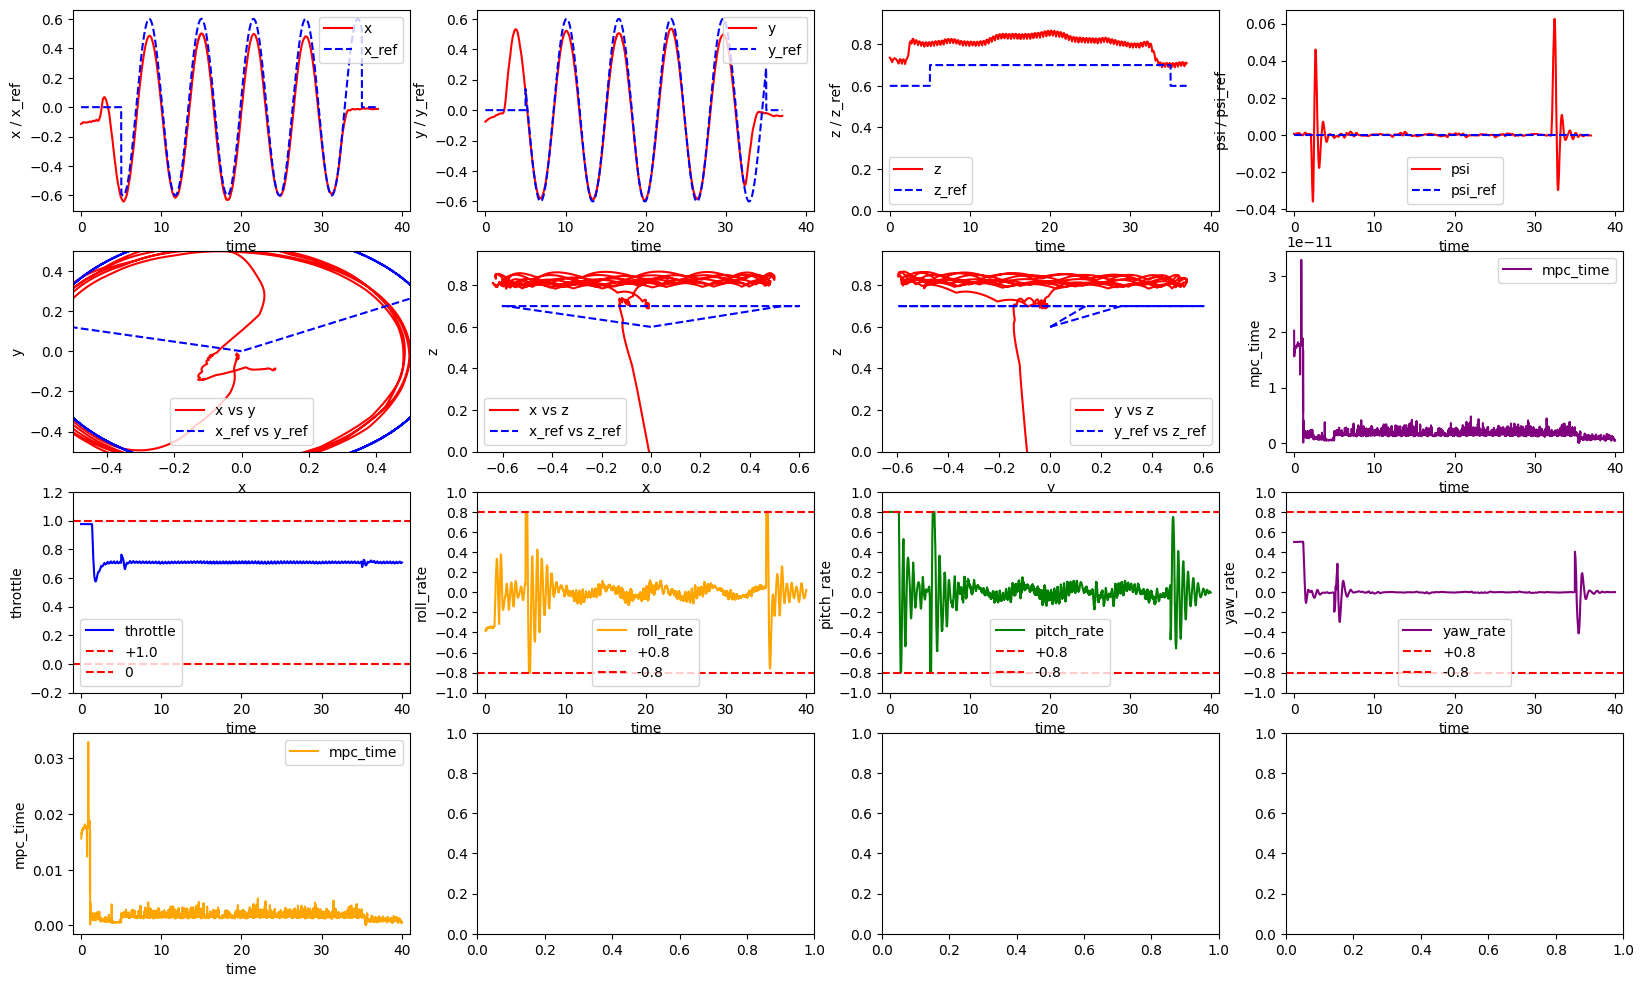

In [5]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)